(0.0, 200.0)

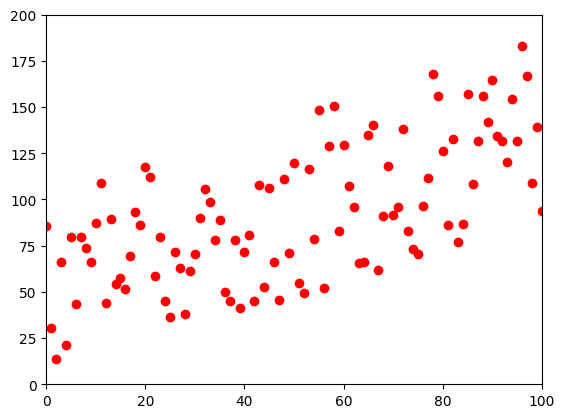

In [286]:
import torch
import torch.nn as nn
from random import uniform, random
import matplotlib.pyplot as plt
from tqdm import tqdm

arr = []
x_train = []
y_train = []
a = random()
b = random()
for i in range(1000):
    x = i
    y = a*x + b + uniform(0, 100)
    arr.append((x, y))
    x_train.append(torch.tensor(x, dtype = torch.float32))
    y_train.append(torch.tensor(y, dtype = torch.float32))
x_train = torch.stack(x_train)
y_train = torch.stack(y_train)
# y = a*x + b
a = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)
for x, y in arr:
    plt.plot(x, y, 'ro')
plt.xlim(0, 100)
plt.ylim(0, 200)

In [287]:
lr = 5e-7
loss_fn = nn.MSELoss()
progress_bar = tqdm(range(1000), desc="Training Progress")
for epoch in progress_bar:
    y = a*x_train + b
    loss = loss_fn(y, y_train)
    loss.backward()
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
        a.grad.zero_()
        b.grad.zero_()
    progress_bar.set_postfix({"Loss": loss.item()})

Training Progress: 100%|██████████| 1000/1000 [00:00<00:00, 2098.42it/s, Loss=1.48e+3]


C:\Users\Function\AppData\Local\Temp\ipykernel_21476\3998894534.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


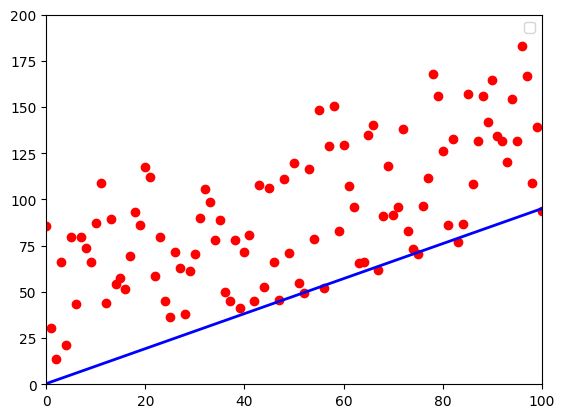

In [288]:
for x, y in arr:
    plt.plot(x, y, 'ro')
plt.xlim(0, 100)
plt.ylim(0, 200)
plt.plot([0, 100], [b.item(), 100*a.item()+b.item()], 'b-', linewidth=2)
plt.legend()
plt.show()